In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv(r'c:\Users\sarah Alnuzha\Downloads\bank-additionalfull\bank-additional-full.csv', sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

there is no Null values 

In [7]:
# Rename default and poutcome to has_credit_card and prev_outcome 

data.rename(columns={'default': 'has_credit_card'}, inplace=True)
data.rename(columns={'poutcome': 'prev_outcome'}, inplace=True)

In [8]:
# List of categorical columns
categ_features = [col for col in dict(data.dtypes) 
                  if dict(data.dtypes)[col] in ['object']]

# Categorical features and their number of levels
print(data[categ_features].nunique())

job                12
marital             4
education           8
has_credit_card     3
housing             3
loan                3
contact             2
month              10
day_of_week         5
prev_outcome        3
y                   2
dtype: int64


In [9]:
# List of numerical columns
num_features = data.columns[data.dtypes != 'object']

# Numerical features and their number of levels
print(data[num_features].nunique())

age                 78
duration          1544
campaign            42
pdays               27
previous             8
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
dtype: int64


In [10]:
# Rename numerical columns
data.rename(columns={'emp.var.rate': 'emp_var_rate'}, inplace=True)
data.rename(columns={'cons.conf.idx': 'confidence_index'}, inplace=True)
data.rename(columns={'cons.price.idx': 'price_index'}, inplace=True)
data.rename(columns={'euribor3m': 'eur_3month'}, inplace=True)
data.rename(columns={'nr.employed': 'no_of_employees'}, inplace=True)

In [11]:
data.head()

,age,job,marital,education,has_credit_card,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,prev_outcome,emp_var_rate,price_index,confidence_index,eur_3month,no_of_employees,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
# display all categorical values
for col in list(data.columns[data.dtypes == 'object']):
  print('\n',col+' :')
  print(data[col].unique())


 job :
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 marital :
['married' 'single' 'divorced' 'unknown']

 education :
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 has_credit_card :
['no' 'unknown' 'yes']

 housing :
['no' 'yes' 'unknown']

 loan :
['no' 'yes' 'unknown']

 contact :
['telephone' 'cellular']

 month :
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

 day_of_week :
['mon' 'tue' 'wed' 'thu' 'fri']

 prev_outcome :
['nonexistent' 'failure' 'success']

 y :
['no' 'yes']


In [13]:
print("Before cleaning, there are " + str(data.shape[0]) + " rows and " + str(data.shape[1]) + " columns in this dataframe.")

Before cleaning, there are 41188 rows and 21 columns in this dataframe.


In [14]:
data.duplicated().sum()
print("There are " + str(data.duplicated().sum()) + " duplicated rows in the dataframe.")

There are 12 duplicated rows in the dataframe.


In [15]:
data = data.drop_duplicates()
print("After pre-cleaning, there are " + str(data.shape[0]) + " rows and " + str(data.shape[1]) + " columns in this dataframe.")

After pre-cleaning, there are 41176 rows and 21 columns in this dataframe.


## GENERAL DATAFRAME STATISTICS

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
price_index,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
confidence_index,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
eur_3month,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
no_of_employees,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


C:\Users\sarah Alnuzha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

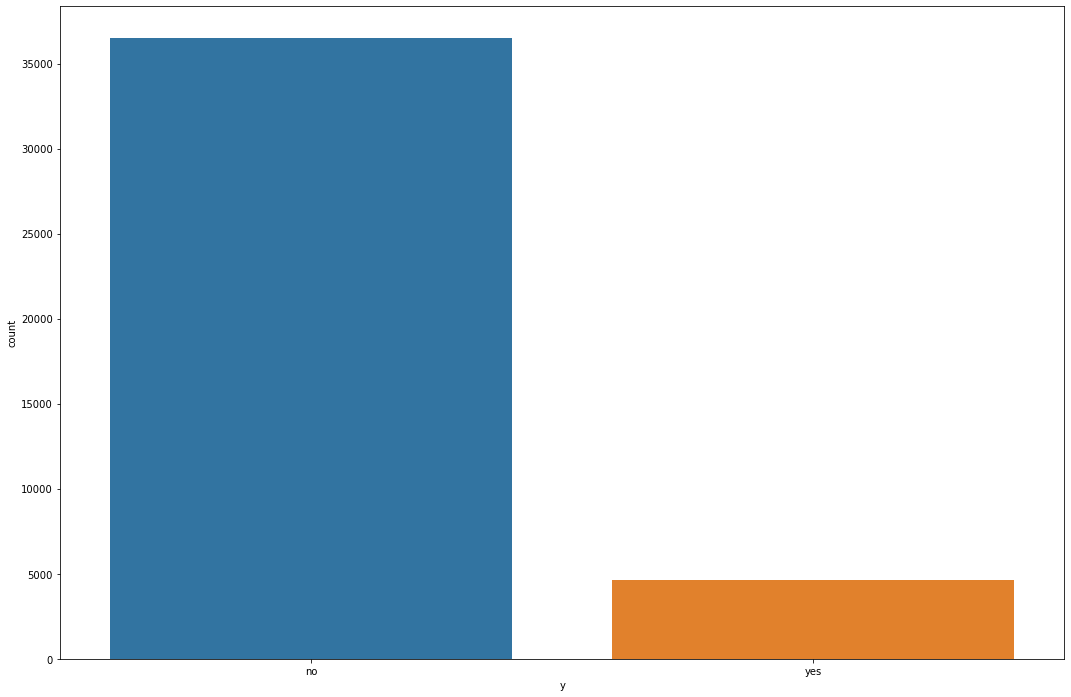

In [17]:
plt.figure(figsize=(18,12))
sns.countplot(data.y)

We found that we have imbalanced data 

Text(0.05, -0.05, '\nObservation:\n \nCampaign seem to be most successful among younger {< 20 years old} and older clients {>60 years old}\n')

findfont: Font family ['San'] not found. Falling back to DejaVu Sans.


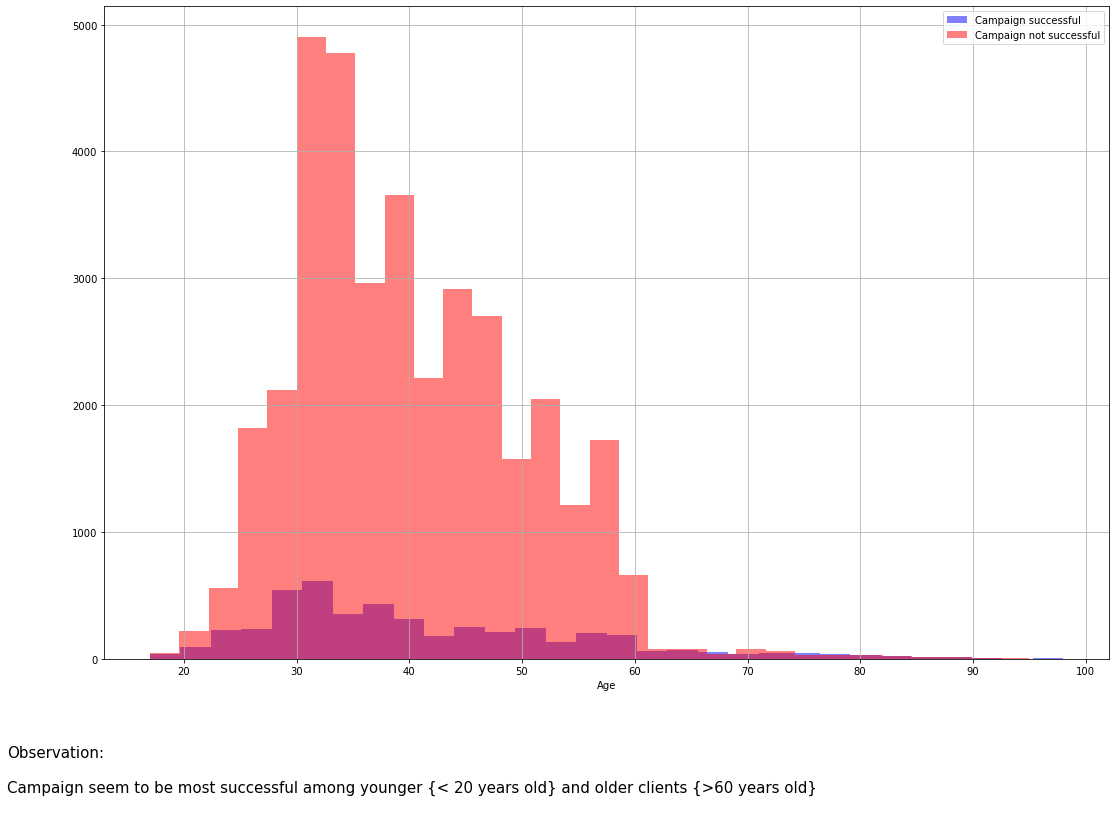

In [18]:
# Comparing age distribution between converted vs unconverted clients

plt.figure(figsize=(18,12))
data[data['y']=='yes']['age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Campaign successful')
data[data['y']=='no']['age'].hist(alpha=0.5,color='red',
                                              bins=30,label='Campaign not successful')
plt.legend()
plt.xlabel('Age')

plt.figtext(0.05,-0.05,'''
Observation:\n 
Campaign seem to be most successful among younger {< 20 years old} and older clients {>60 years old}
''', family='San', size=15, ha='left')

we found that peaple samller that 20 and older than 60 are subscribe more with the preoise campaign (students and retired) as below.

In [19]:
# Mean age by profession
data[['job', 'age']].groupby(by=['job'], axis=0).mean().sort_values(by='age', ascending=True)

,age
job,
student,25.894857
services,37.925637
admin.,38.186870
technician,38.508681
blue-collar,39.555820
unemployed,39.733728
self-employed,39.949331
entrepreneur,41.723214
management,42.362859


Text(0.05, -0.05, '\nObservation:\n \nStudents tend to be younger while retirees are the oldest on average. \n\nNote that there are apparent outliers among both professions (young retirees and older students).\n')

findfont: Font family ['San'] not found. Falling back to DejaVu Sans.


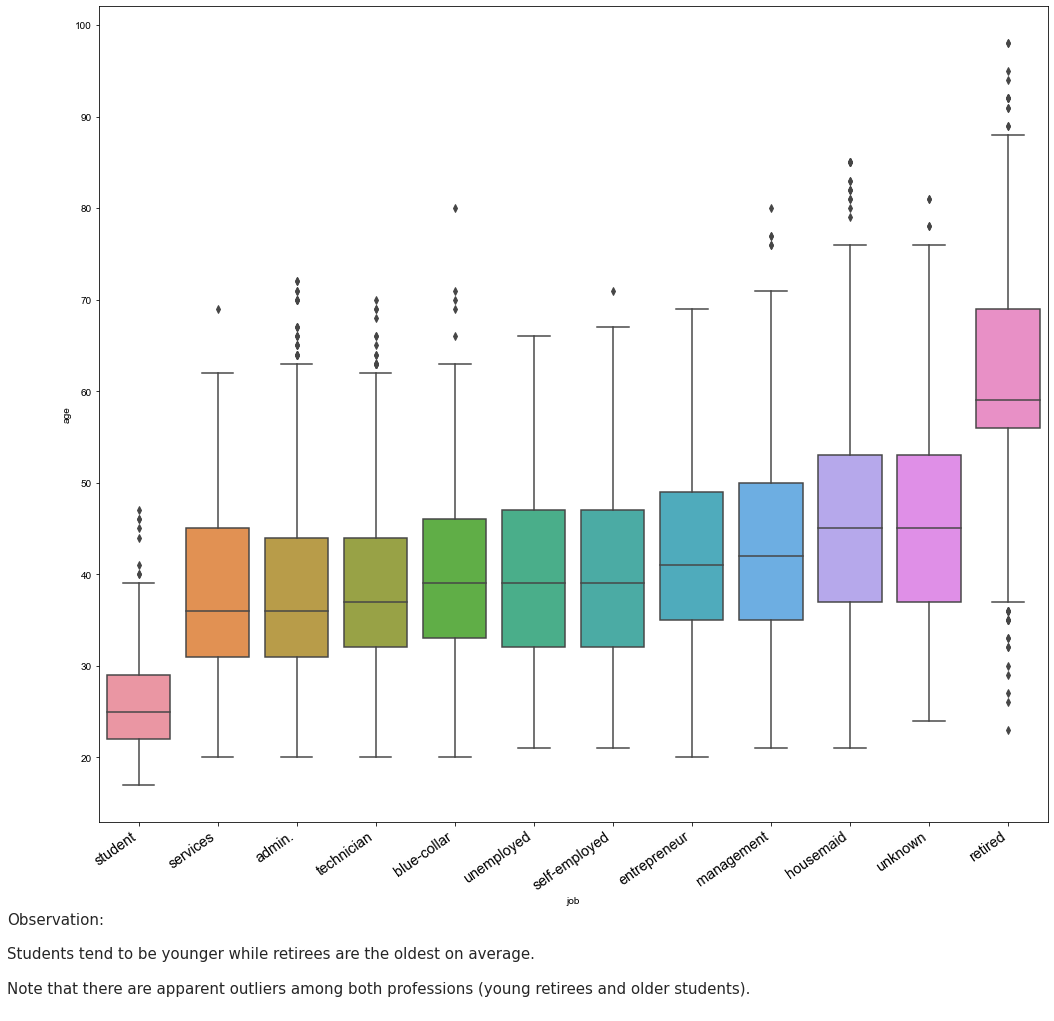

In [20]:
# Plot age distribution of clients by profession

job_order = data[['job', 'age']].groupby(by=['job'], axis=0).mean().sort_values(by='age', ascending=True).index

plt.figure(figsize=(17, 15))
sns.boxplot(x='job', y='age', data=data, order=job_order)
sns.set(font_scale=1)
plt.xticks(
    rotation=35, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

plt.figtext(0.05,-0.05,'''
Observation:\n 
Students tend to be younger while retirees are the oldest on average. \n
Note that there are apparent outliers among both professions (young retirees and older students).
''', family='San', size=15, ha='left')

Text(0.05, -0.05, '\nObservation:\n \nThe majority of our clients are contacted through their home phones as opposed to their cellular telephone.\n')

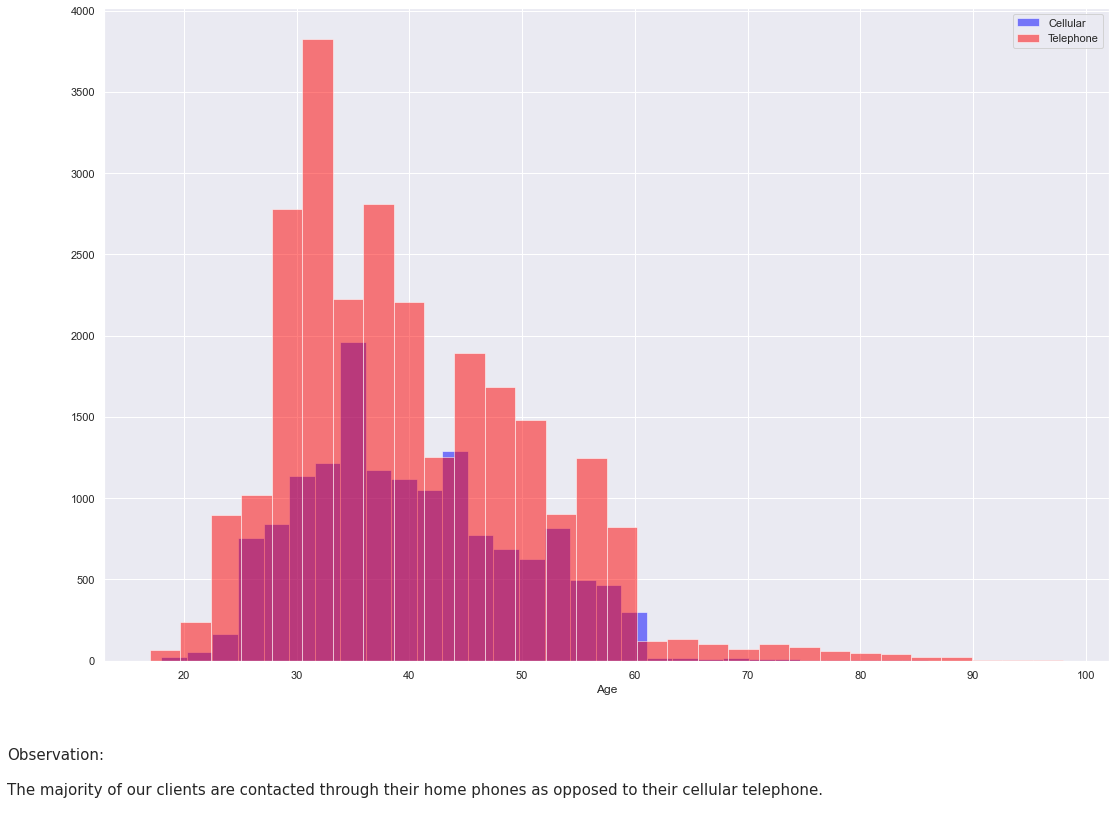

In [21]:
# Comparing age distribution between clients contacted on cellular vs telephone

plt.figure(figsize=(18,12))
data[data['contact']=='telephone']['age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Cellular')
data[data['contact']!='telephone']['age'].hist(alpha=0.5,color='red',
                                              bins=30,label='Telephone')
plt.legend()
plt.xlabel('Age')

plt.figtext(0.05,-0.05,'''
Observation:\n 
The majority of our clients are contacted through their home phones as opposed to their cellular telephone.
''', family='San', size=15, ha='left')

<AxesSubplot:xlabel='month', ylabel='count'>

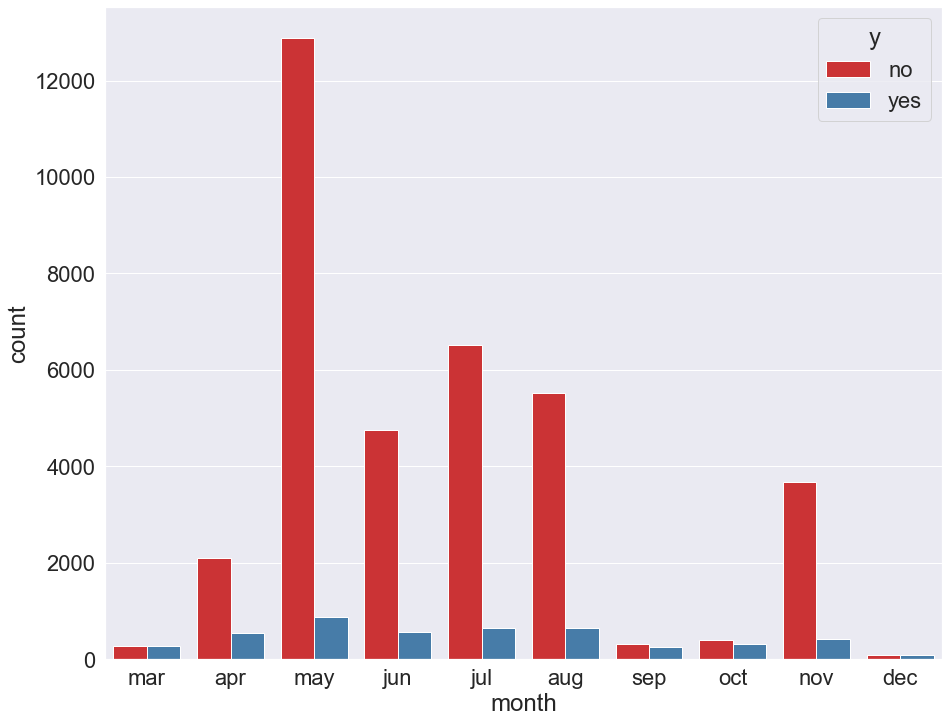

In [22]:
# Plot campaign success by month

month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

plt.figure(figsize=(15,12))
sns.set(font_scale=2)
sns.countplot(x='month', hue='y', data=data, order = month_order, palette='Set1')

CORRELATION MATRIX OF DATAFRAM

In [23]:
data.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,price_index,confidence_index,eur_3month,no_of_employees
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp_var_rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
price_index,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
confidence_index,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
eur_3month,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
no_of_employees,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


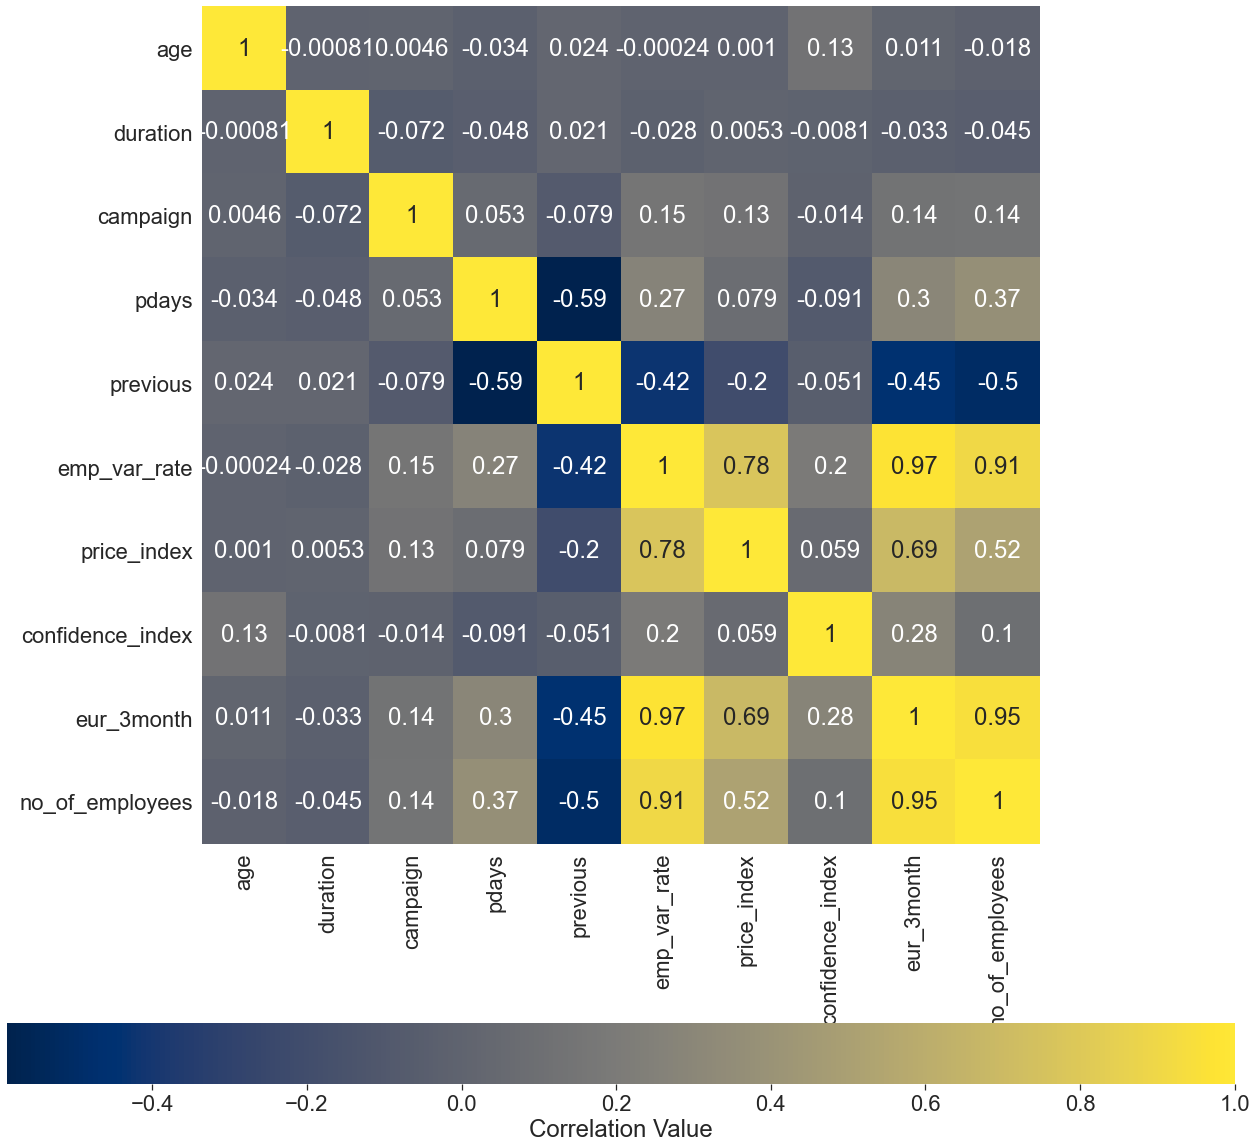

In [24]:
#cmap = sns.diverging_palette(100, 200, s = 40, l = 65, n = 9)
# show the coorelation in graph
corrmat = data.corr()
plt.subplots(figsize = (22, 22))
sns.heatmap(corrmat,cmap = "cividis",annot = True, square = True, cbar_kws = {'label': 'Correlation Value', 'orientation': 'horizontal'});

Outlier handling

In [25]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [26]:
# Replace outlier values with median

for col in ['age', 'campaign', 'pdays', 'confidence_index']:
  sample_outliers = detect_outliers_iqr(data[col])
  median = np.median(data[col])
  for i in sample_outliers:
      data[col] = np.where(data[col]==i, median, data[col])

In [27]:
# List of categorical columns
[col for col in dict(data.dtypes) 
                  if dict(data.dtypes)[col] in ['object']]

['job',
 'marital',
 'education',
 'has_credit_card',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'prev_outcome',
 'y']

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,39.581212,9.621591,17.000,32.000,38.000,47.000,69.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.041748,1.242412,1.000,1.000,2.000,3.000,6.000
pdays,41176.0,999.000000,0.000000,999.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
price_index,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
confidence_index,41176.0,-40.664253,4.405107,-50.800,-42.700,-41.800,-36.400,-29.800
eur_3month,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
no_of_employees,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


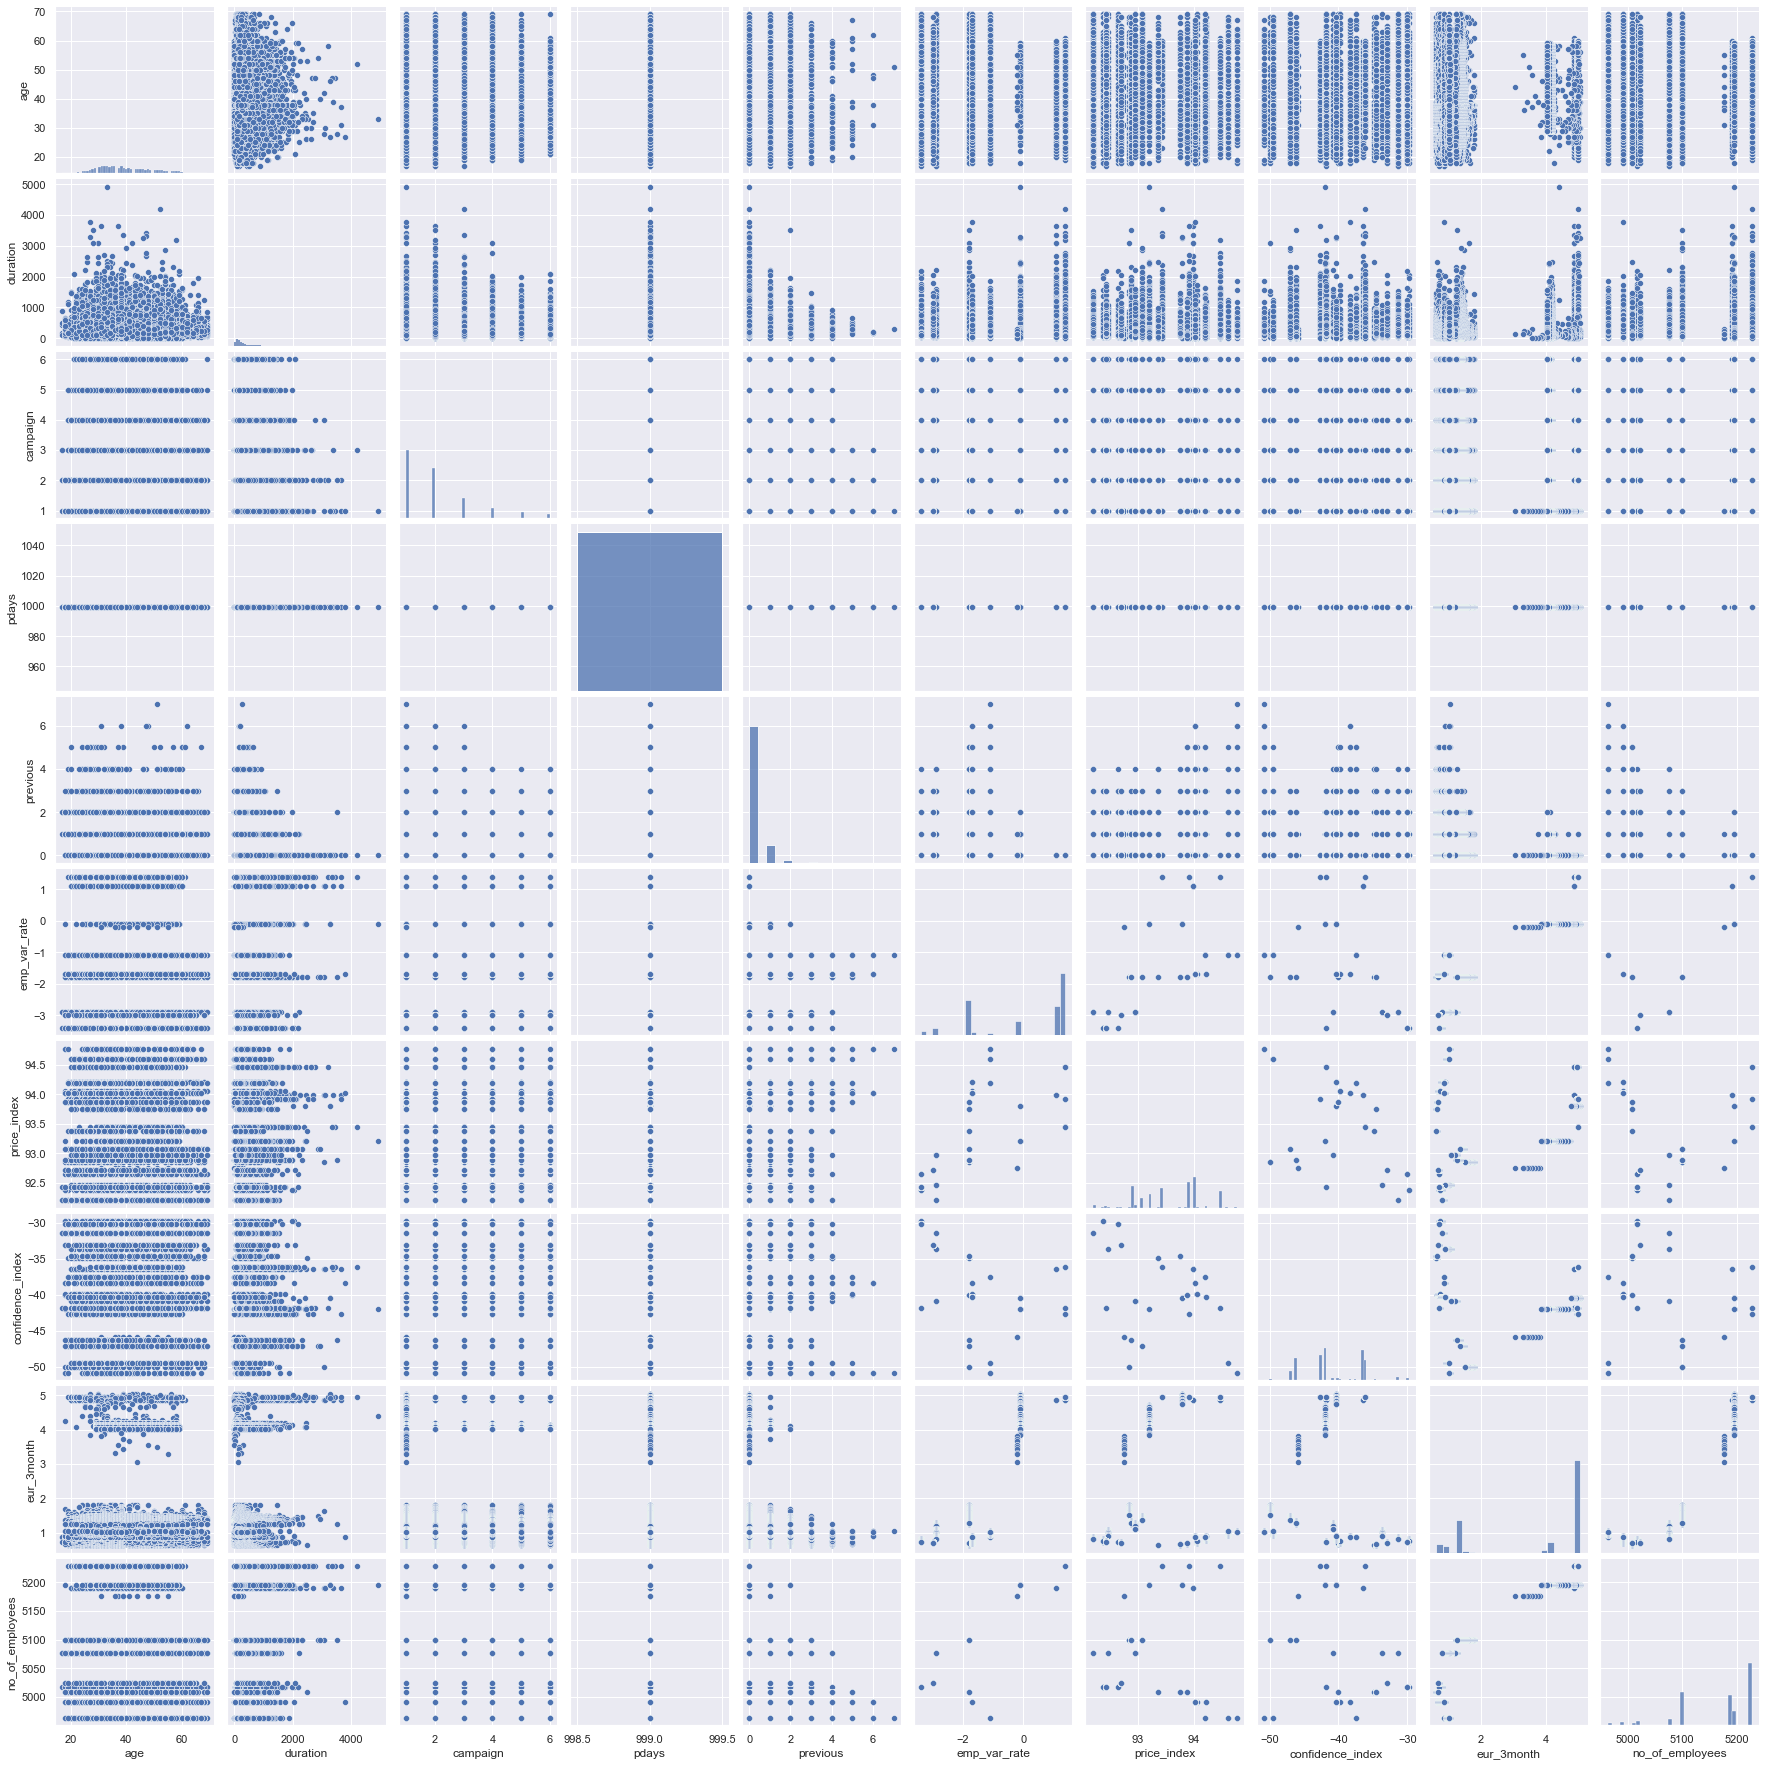